# Programming for Data Analytics - Assignment 6 - weather

************************
*Task 05 of the assessment - Knock airport Weather* 
************************

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


*Plot:*

- The temperature
- The mean temperature each day
- The mean temperature for each month


*For additional marks:*
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

************

Import nessesary libaries:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After inspecting this data, I need to ignore first few rows, to get into my dataset. 

In [26]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [27]:
nan_values = df.isna()

print(nan_values)

         date    ind   rain  ind.1   temp  ind.2   wetb  dewpt  vappr   rhum  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
248389  False  False  False  False  False  False  False  False  False  False   
248390  False  False  False  False  False  False  False  False  False  False   
248391  False  False  False  False  False  False  False  False  False  False   
248392  False  False  False  False  False  False  False  False  False  False   
248393  False  False  False  False  False  False  False  False  False  False   

        ...  ind.3   wdsp  ind.4  wddir

As the `date` column contains date and time, I will convert this column into `datetime` object. For plotting I need only date, so it will be easier to manipluate with this data. 

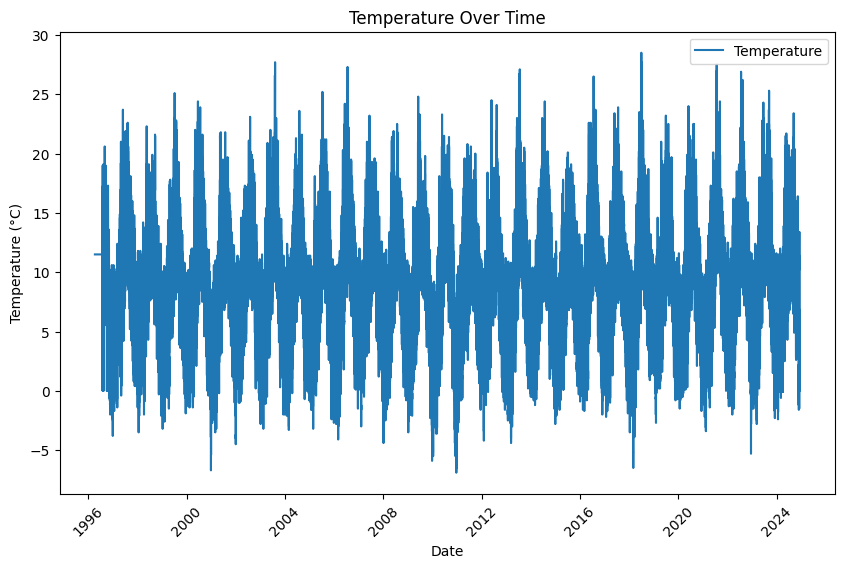

In [28]:
# Converting data to date-time object 
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M') # Day of the month as a zero-padded decimal number [01, 02, ..., 30, 31]
                                                                     # Month as locale's abbreviated name
                                                                     # Year with century as a decimal number
                                                                     # Hour (24-hour clock) as a zero-padded decimal number [00, 01, ..., 22, 23]
                                                                     # Minute as a zero-padded decimal number [00, 01, ..., 58, 59]

# Splitting the 'datetime' into 'date' and 'time'
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Creating a plot for temperature over time 
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()






Now, to plot mean temperature per day over the time in my dataset. I am using `groupby()` to group data based on specific column values and calculate mean for each day. 

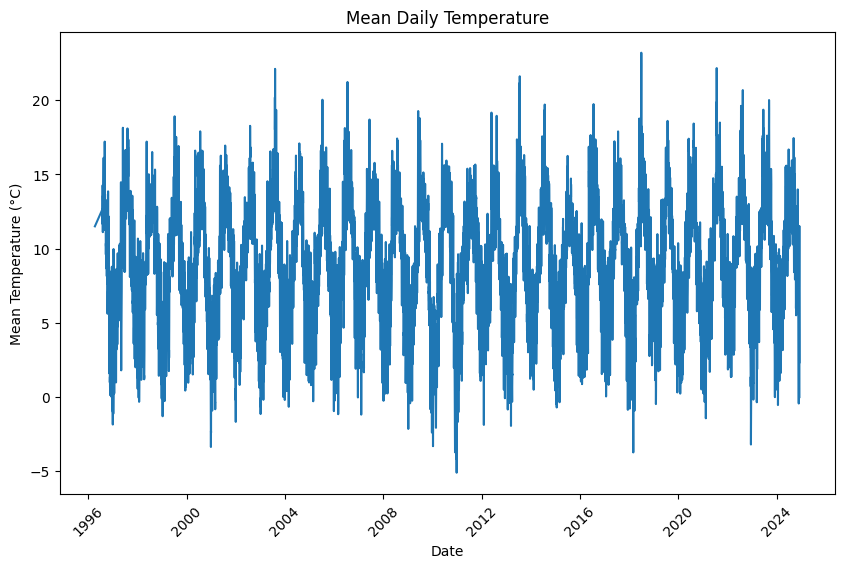

In [29]:
# Calculate daily mean temperature
mean_day = df.groupby('date')['temp'].mean()

# Plot daily mean temperature
plt.figure(figsize=(10, 6))
mean_day.plot()
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.xticks(rotation=45)
plt.show()

The simiar excercise will plot mean temperature per month over the time in my dataset.  I will use `df['month'] = df['datetime'].dt.to_period('M')` which can convert the datetime column into a period representing only the month and year. 


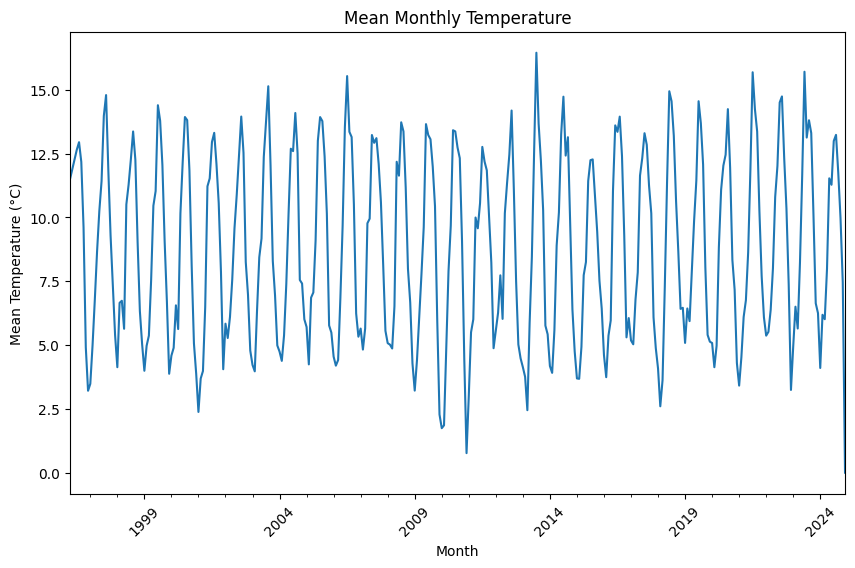

In [30]:
# Calculate monthly mean temperature
df['month'] = df['datetime'].dt.to_period('M')  # to_period('M') converts the datetime to a monthly period
mean_month = df.groupby('month')['temp'].mean()

# Plot monthly mean temperature
plt.figure(figsize=(10, 6))
mean_month.plot()
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Monthly Temperature')
plt.xticks(rotation=45)
plt.show()

***
**Additional plots**
***

In [31]:
# lets see the data again

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Lets plot the windspeed 

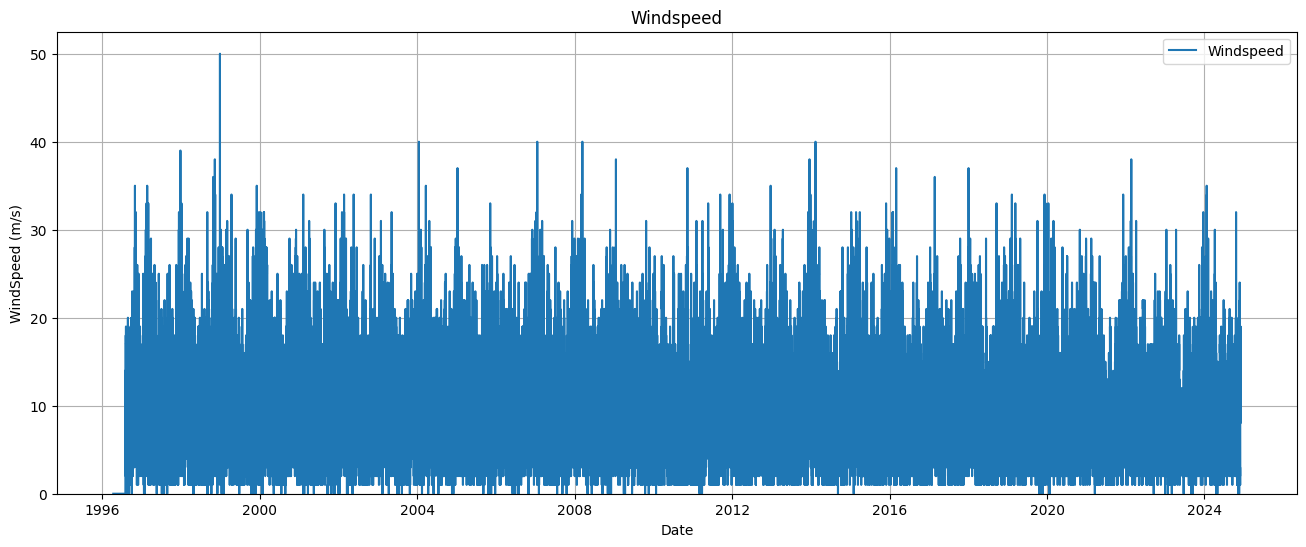

In [33]:
# Plotting Windspeed
# Extracting the month from the 'datetime' column
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Selecting 'month' and 'wdsp' columns 
df['month'] = df['datetime'].dt.to_period('M')

cleandf = df[['datetime', 'wdsp']].copy()  # Make a copy to avoid warnings

# Replace spaces with NaN and drop rows with NaN in 'wdsp'
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)
cleandf.dropna(subset=['wdsp'], inplace=True)

# Convert 'wdsp' to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)

# Plotting data
plt.figure(figsize=(16, 6))
plt.plot(cleandf['datetime'], cleandf['wdsp'], label='Windspeed')

plt.title('Windspeed')
plt.xlabel('Date')
plt.ylabel('WindSpeed (m/s)')

# Adjust y-axis range
plt.ylim(bottom=0)


plt.grid(True)
plt.legend()
plt.show()


**Rolling Windspeed (24-hour window)**

******
End